## MAJOR PROJECT IN MACHINE LEARNING


## GROUP NAME:  ML-MAJOR-APR-ML043B6


 ### Problem Statement:Predicting the costs of used cars given the data collected from various sources and distributed across various locations in India.


## FEATURES 

* Name: The brand and model of the car. 
* Location: The location in which the car is being sold or is available for purchase. 
* Year: The year or edition of the model.
* Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type: The type of fuel used by the car.
* Transmission: The type of transmission used by the car. 
* Owner_Type: Whether the ownership is Firsthand, Second hand or other. 
* Mileage: The standard mileage offered by the car company in kmpl or km/kg
* Engine: The displacement volume of the engine in cc.
* Power: The maximum power of the engine in bhp. 
* Seats: The number of seats in the car. 
* Price: The price of the used car in INR Lakhs.

## STRATEGY

* Importing the libraries
* Loading the datasets
* Exploratory Data analysis
* Data Preprocessing
* Building and Training the models
* Selecting the Best model
* Making Predictions on unknown(Train) data

## IMPORTING THE LIBRARIES

In [1]:
from sklearn.model_selection import train_test_split  
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import math
from sklearn.metrics import mean_squared_error

## LOADING THE DATASETS

In [2]:
pr = pd.read_excel('Data_Train.xlsx')
prtest=pd.read_excel('Data_Test.xlsx')

#To see how many rows and columns are there in each dataset
pr.shape, prtest.shape

((6019, 12), (1234, 11))

## EXPLORATORY DATA ANALYSIS

In [3]:
pr.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [4]:
# To see the number of unique values in each column
pr.nunique()

Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
Price                1373
dtype: int64

In [5]:
# To see the column Data Types and non missing values
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


- To check whether by mistakenly same data has been added to the list or not!


In [6]:
temp = pd.DataFrame(pr,columns=['Name','Location','Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power','Seats','Price'])
dup_rows=temp[temp.duplicated(['Name','Location','Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power','Seats','Price'])]
print(dup_rows)


Empty DataFrame
Columns: [Name, Location, Year, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power, Seats, Price]
Index: []


 - We got no such double entry of data.


## To see the unique values in each column 
 
 
 
   - First function will be used to count the unique values present. 
   - Second function will be used for retrieving those unique values.


In [7]:
# To see the unique values present in each column
pr.Name.nunique()

1876

In [8]:
pr.Name.unique()


array(['Maruti Wagon R LXI CNG', 'Hyundai Creta 1.6 CRDi SX Option',
       'Honda Jazz V', ..., 'Volkswagen Polo IPL II 1.2 Petrol Highline',
       'Tata Bolt Revotron XT', 'Mahindra Xylo D4 BSIV'], dtype=object)

In [9]:
pr.Location.nunique()

11

In [10]:
pr.Location.unique()


array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [11]:
pr.Fuel_Type.nunique()

5

In [12]:

pr.Fuel_Type.unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [13]:
pr.Transmission.nunique()

2

In [14]:
pr.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [15]:
pr.Owner_Type.nunique()

4

In [16]:
pr.Owner_Type.unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [17]:
pr.Seats.nunique()

9

In [18]:
pr.Seats.unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

In [19]:
pr.Year.nunique()


22

In [20]:
pr.Year.unique()


array([2010, 2015, 2011, 2012, 2013, 2016, 2018, 2014, 2017, 2007, 2009,
       2008, 2019, 2006, 2005, 2004, 2002, 2000, 2003, 1999, 2001, 1998],
      dtype=int64)

  ## Graphical Representation and relation depiction of data
 

 
 - For the following graphs as Price is our basic constraint, so we will be plotting relations with respect to Price.


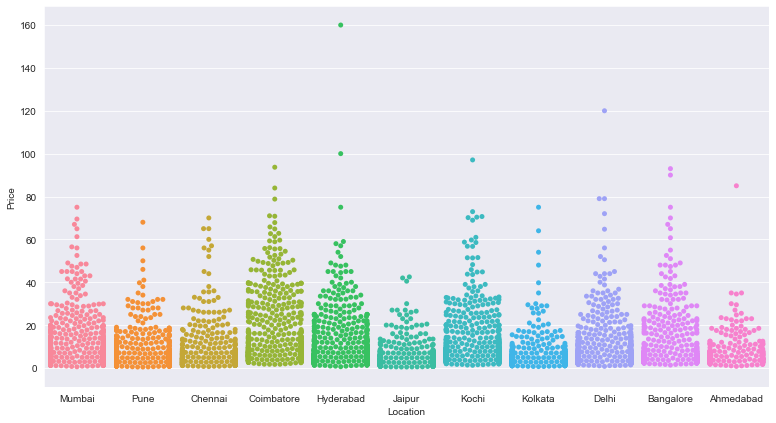

In [21]:
sns.set_style('darkgrid')
fig_dims = (13, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.swarmplot(x='Location',y='Price',data=pr,ax=ax)

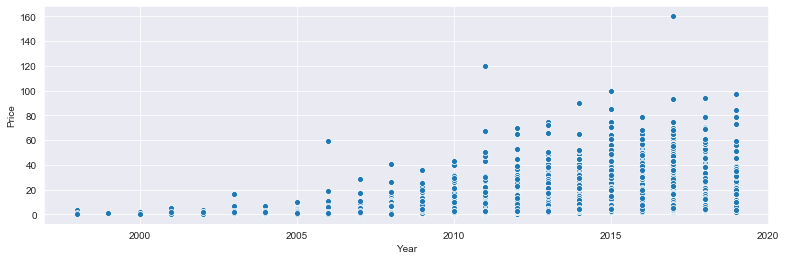

In [22]:
fig_dims = (13, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot('Year','Price',data=pr,ax=ax)

In [ ]:
fig_dims = (5, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot('Fuel_Type','Price',data=pr,ax=ax)

In [ ]:
fig_dims = (5, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot('Owner_Type','Price',data=pr,ax=ax)

In [ ]:
fig_dims = (3, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot('Transmission','Price',data=pr,ax=ax)

In [ ]:
fig_dims = (13, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot('Seats','Price',data=pr,ax=ax)

In [ ]:
sns.scatterplot('Kilometers_Driven','Price',data=pr)

In [ ]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot('Mileage','Price',data=pr,ax=ax)

In [ ]:
fig_dims = (13, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot('Power','Price',data=pr)

In [ ]:
fig_dims = (13, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot('Engine','Price',data=pr)

## COUNTING THE VALUES THAT NEED TO BE REFERENCED AND REMOVING THE OUTLIERS


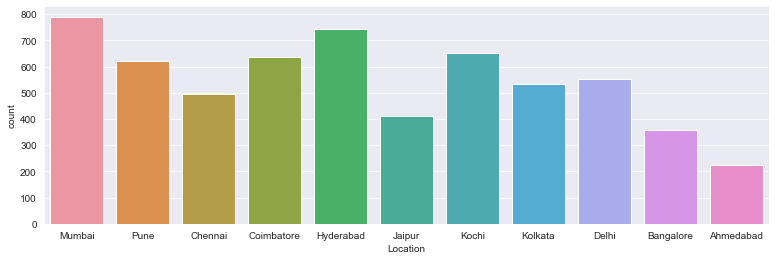

In [23]:
fig_dims = (13, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Location',data=pr)

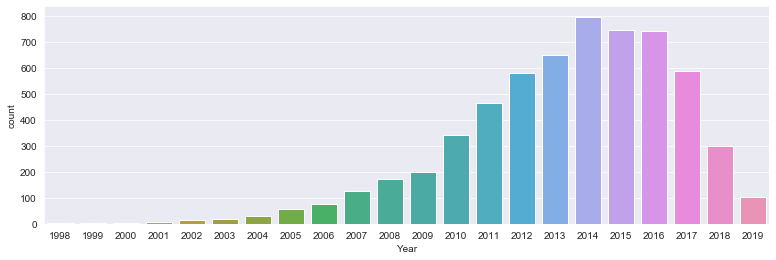

In [24]:
fig_dims = (13, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Year',data=pr)

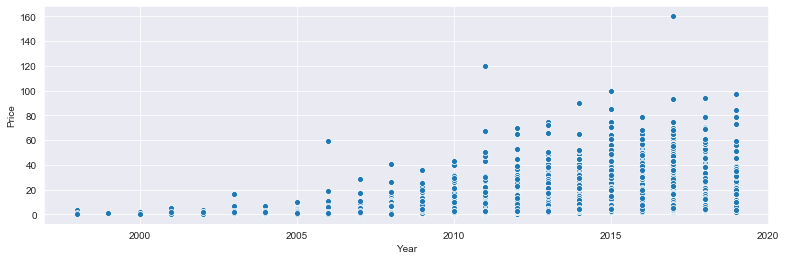

In [25]:
fig_dims = (13, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot('Year','Price',data=pr)

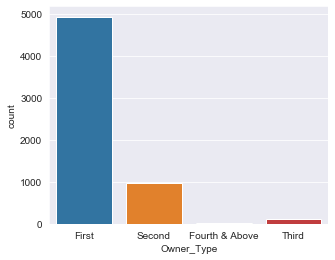

In [26]:
fig_dims = (5, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Owner_Type',data=pr)

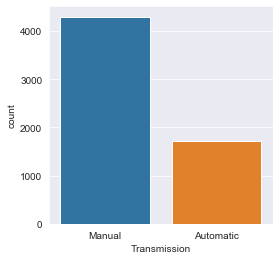

In [27]:
fig_dims = (4, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Transmission',data=pr)

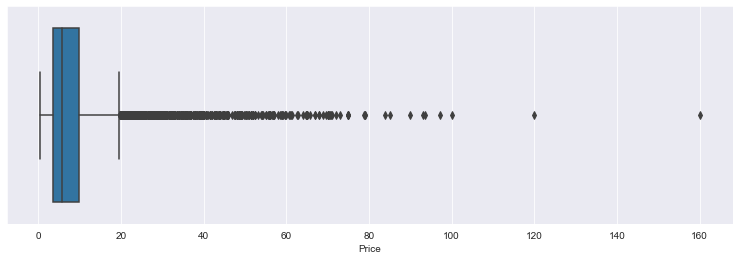

In [28]:
fig_dims = (13, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot('Price',data=pr,ax=ax)

## DATA PREPROCESSING

In [29]:
# To find the no of missing values in each attribute of data
pr.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [30]:
# The original shape of dataset
pr.shape

(6019, 12)

In [31]:
#  To drop the rows having missing data
pr.dropna(how='any',inplace=True)


In [32]:
pr.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [33]:
# Removing the cars which are of extremely high price
pr = pr[pr['Name'] != 'Ambassador Classic Nova Diesel']
pr = pr[pr['Name'] != 'Lamborghini Gallardo Coupe']
pr = pr[pr['Name'] != 'Force One LX 4x4']
pr = pr[pr['Name'] != 'Force One LX ABS 7 Seating']
pr = pr[pr['Name'] != 'Smart Fortwo CDI AT']
len(pr)

5969

- Cars listed should be driven more than 999 Km and less than 700000 Km.


In [34]:
pr = pr[pr['Kilometers_Driven'] < 700000]
pr = pr[pr['Kilometers_Driven'] > 999]

- Taking into consideration only those cars which are powered without electricity, because our country does not have much electric charging stations.


In [35]:
pr = pr[pr['Fuel_Type'] != 'Electric']
len(pr)

5964

In [36]:
# Forming a dataset containing both training and testing data for preprocessing of data 
tr=pr.append(prtest,ignore_index=True,sort=False)

In [37]:
tr.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [38]:
# Creating a new variable 'Car age ' containing the age of car
tr['Car age']=2020-tr.Year

In [39]:
# Converting the string variables into numerical.
tr.Engine=tr.Engine.apply(lambda x: str(x).split(" ")[0]).astype(float)

In [40]:
tr.Mileage=tr.Mileage.apply(lambda x: str(x).split(" ")[0]).astype(float)

In [41]:
tr.Power=tr.Power.replace('null bhp','0 ')

In [42]:
tr.Power=tr.Power.apply(lambda x: str(x).split(" ")[0]).astype(float)

In [43]:
tr.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,10
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,5
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,9
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,8
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,7


In [44]:
# creating a new variable which contains the brand name of car
tr['Brand'] = tr.Name.apply(lambda x: ' '.join(x.split(' ')[:2]))

In [45]:
tr.Price.sort_values(ascending=False)

4042    160.00
5864    100.00
1492     97.07
1959     93.67
1969     93.00
         ...  
7193       NaN
7194       NaN
7195       NaN
7196       NaN
7197       NaN
Name: Price, Length: 7198, dtype: float64

In [46]:
tr.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car age,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,10,Maruti Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,5,Hyundai Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,9,Honda Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,8,Maruti Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,7,Audi A4


In [47]:
# Shape of dataset after removing missing values
tr.shape


(7198, 14)

In [48]:
tr.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
Price                1234
Car age                 0
Brand                   0
dtype: int64

In [49]:
def aggregate_functions(tr):        
    
    agg_func = {
        'Location' : ['count'],
        'Mileage' : ['mean'],
        'Power' : ['mean'],
        'Engine' : ['mean'] }
    
    agg_tr = tr.groupby(['Brand']).agg(agg_func)
    agg_tr.columns = ['_'.join(col).strip() for col in agg_tr.columns.values]
    agg_tr.reset_index(inplace=True)
    
    agg_tr = pd.merge(tr, agg_tr, on='Brand', how='left')
    
    return agg_tr
tr=aggregate_functions(tr)

In [50]:
tr.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car age,Brand,Location_count,Mileage_mean,Power_mean,Engine_mean
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,10,Maruti Wagon,176,20.963011,66.197045,1014.147727
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,5,Hyundai Creta,118,17.673898,121.830508,1572.745763
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,9,Honda Jazz,69,20.586957,91.521739,1281.246377
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,8,Maruti Ertiga,86,20.633953,89.712093,1287.860465
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,7,Audi A4,90,16.438111,162.041556,2024.922222


In [51]:
tr.shape

(7198, 18)

In [52]:
dummy_name=pd.get_dummies(tr.Name)# creating dummy variables for the categorical variables

In [53]:
tr=pd.concat([tr,dummy_name],axis=1)

In [54]:
tr.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,...,Volvo S80 D5,Volvo V40 Cross Country D3,Volvo V40 D3,Volvo V40 D3 R Design,Volvo XC60 D4 SUMMUM,Volvo XC60 D4 Summum,Volvo XC60 D5,Volvo XC60 D5 Inscription,Volvo XC90 2007-2015 D5 AT AWD,Volvo XC90 2007-2015 D5 AWD
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,...,0,0,0,0,0,0,0,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,...,0,0,0,0,0,0,0,0,0,0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,...,0,0,0,0,0,0,0,0,0,0
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,...,0,0,0,0,0,0,0,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,...,0,0,0,0,0,0,0,0,0,0


In [55]:
dummyloc=pd.get_dummies(tr.Location)

In [56]:
tr=pd.concat([tr,dummyloc],axis=1)

In [57]:
dummyfuel=pd.get_dummies(tr.Fuel_Type)

In [58]:
tr=pd.concat([tr,dummyfuel],axis=1)

In [59]:
dummytrans=pd.get_dummies(tr.Transmission)

In [60]:
tr=pd.concat([tr,dummytrans],axis=1)

In [61]:
dummyowner=pd.get_dummies(tr.Owner_Type)

In [62]:
tr=pd.concat([tr,dummyowner],axis=1)

In [63]:
tr.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,...,CNG,Diesel,LPG,Petrol,Automatic,Manual,First,Fourth & Above,Second,Third
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,...,1,0,0,0,0,1,1,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,...,0,1,0,0,0,1,1,0,0,0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,...,0,0,0,1,0,1,1,0,0,0
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,...,0,1,0,0,0,1,1,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,...,0,1,0,0,1,0,0,0,1,0


In [64]:
tr.drop(['Name','Brand','Location','Fuel_Type','Owner_Type','Transmission'], axis=1, inplace=True)

In [65]:
tr.shape

(7198, 2049)

In [66]:
tr.drop(['Year'],axis=1,inplace=True)

In [67]:
# Splitting the whole dataset into Training data and Testing data
train_tr = tr[tr['Price'].isnull()!=True]
test_tr = tr[tr['Price'].isnull()==True]
test_tr.drop('Price', axis=1, inplace=True)

C:\Users\ksuma\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [69]:
train_tr.shape,test_tr.shape

((5964, 2048), (1234, 2047))

In [70]:
y=train_tr.Price

In [71]:
train_tr.drop('Price',axis=1,inplace=True)
x=train_tr

In [72]:
x.shape,y.shape


((5964, 2047), (5964,))

In [73]:
x.head()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Car age,Location_count,Mileage_mean,Power_mean,Engine_mean,...,CNG,Diesel,LPG,Petrol,Automatic,Manual,First,Fourth & Above,Second,Third
0,72000,26.60,998.0,58.16,5.0,10,176,20.963011,66.197045,1014.147727,...,1,0,0,0,0,1,1,0,0,0
1,41000,19.67,1582.0,126.20,5.0,5,118,17.673898,121.830508,1572.745763,...,0,1,0,0,0,1,1,0,0,0
2,46000,18.20,1199.0,88.70,5.0,9,69,20.586957,91.521739,1281.246377,...,0,0,0,1,0,1,1,0,0,0
3,87000,20.77,1248.0,88.76,7.0,8,86,20.633953,89.712093,1287.860465,...,0,1,0,0,0,1,1,0,0,0
4,40670,15.20,1968.0,140.80,5.0,7,90,16.438111,162.041556,2024.922222,...,0,1,0,0,1,0,0,0,1,0


## Splitting the labeled dataset into training and testing data

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)


# BUILDING & TRAINING THE MODELS

## KNN Regression:

In [75]:
from sklearn.neighbors import KNeighborsRegressor

In [76]:
error=[]
for k in range(1,13):
    knn=KNeighborsRegressor(n_neighbors=1)
    knn.fit(x_train,y_train)
    pred=knn.predict(x_test)
    mse=metrics.mean_squared_error(y_test,pred)
    rmse=math.sqrt(mse)
    error.append(rmse)
    print('for neighbors=',k,'rmse:',rmse)

for neighbors= 1 rmse: 8.770842086918623
for neighbors= 2 rmse: 8.770842086918623
for neighbors= 3 rmse: 8.770842086918623
for neighbors= 4 rmse: 8.770842086918623
for neighbors= 5 rmse: 8.770842086918623
for neighbors= 6 rmse: 8.770842086918623
for neighbors= 7 rmse: 8.770842086918623
for neighbors= 8 rmse: 8.770842086918623
for neighbors= 9 rmse: 8.770842086918623
for neighbors= 10 rmse: 8.770842086918623
for neighbors= 11 rmse: 8.770842086918623
for neighbors= 12 rmse: 8.770842086918623


- So,the root mean squared error is not varying for the no of neighbors in KNN algorithm

Text(0, 0.5, 'RMSE')

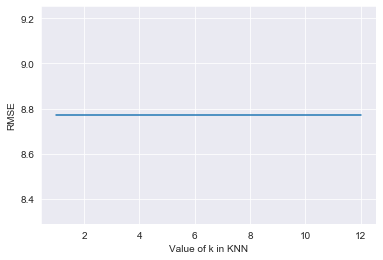

In [77]:
x=range(1,13)
plt.plot(x,error)
plt.xlabel('Value of k in KNN')
plt.ylabel('RMSE')

- Graph between actual and predicted values:

Text(0, 0.5, 'Predicted values of price')

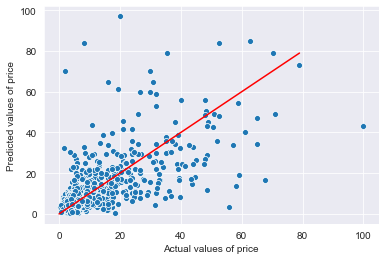

In [78]:
sns.scatterplot(y_test,pred)
x=range(0,80)
y=range(0,80)
plt.plot(x,y,color='red')
plt.xlabel("Actual values of price")
plt.ylabel("Predicted values of price")

## Random Forest Regression

In [79]:
from sklearn.ensemble import RandomForestRegressor


In [80]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)


In [81]:
rf.fit(x_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [82]:
predrf=rf.predict(x_test)
reg_ols=sm.OLS(endog=y_train,exog=x_train).fit()



- Finding the root mean squared error

In [83]:
mse=metrics.mean_squared_error(y_test,predrf)
rmse=math.sqrt(mse)
print('RMSE is:',rmse)

RMSE is: 3.386985497297232


- Graph between actual and predicted values:

Text(0, 0.5, 'Predicted values of price')

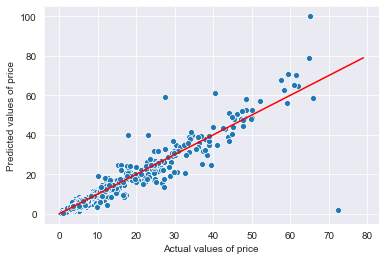

In [84]:
sns.scatterplot(predrf,y_test)
x=range(0,80)
y=range(0,80)
plt.plot(x,y,color='red')
plt.xlabel("Actual values of price")
plt.ylabel("Predicted values of price")


## LightGBM Regressor

- Advantages of Light GBM

 - Faster training speed and higher efficiency: Light GBM use histogram based algorithm i.e it buckets continuous feature values into discrete bins which fasten the training procedure.

 - Lower memory usage: Replaces continuous values to discrete bins which result in lower memory usage.


In [93]:
from math import sqrt
from sklearn.metrics import mean_squared_log_error
import lightgbm as lgb
train_data = lgb.Dataset(x_train, label=y_train)
test_data = lgb.Dataset(x_test, label=y_test)

param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.05, 
         'num_iterations': 1000,
         'num_leaves': 30,
         'max_depth': -1,
         'min_data_in_leaf': 4,
         'bagging_fraction': 0.78,
         'bagging_freq': 1,
         'feature_fraction': 0.65,
         }

lgbm = lgb.train(params=param,
                 verbose_eval=100,
                 early_stopping_rounds=50,
                 train_set=train_data,
                 valid_sets=[test_data])

y_pred_lgbm = lgbm.predict(x_test)
print('RMSLE:', sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred_lgbm))))

C:\Users\ksuma\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 50 rounds
[100]	valid_0's rmse: 3.02768
[200]	valid_0's rmse: 2.88612
[300]	valid_0's rmse: 2.85856
[400]	valid_0's rmse: 2.84492
[500]	valid_0's rmse: 2.84186
Early stopping, best iteration is:
[538]	valid_0's rmse: 2.84014
RMSLE: 2.8401411634757188


- Finding the root mean squared error

In [94]:
mse=metrics.mean_squared_error(y_test,y_pred_lgbm)
rmse=math.sqrt(mse)
print('RMSE is:',rmse)

RMSE is: 2.8401411634757188


- Graph between actual and predicted values:

Text(0, 0.5, 'Predicted values of price')

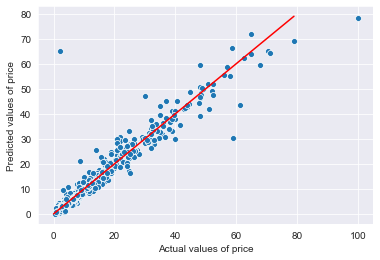

In [95]:
sns.scatterplot(x=y_test,y=y_pred_lgbm)
x=range(0,80)
y=range(0,80)
plt.plot(x,y,color='red')
plt.xlabel("Actual values of price")
plt.ylabel("Predicted values of price")

## Decision Tree Regressor

In [85]:
import sklearn.tree as model
dt=model.DecisionTreeRegressor(criterion='mse')
dt.fit(x_train,y_train)
preddec=dt.predict(x_test)
reg_ols=sm.OLS(endog=y_train,exog=x_train).fit()


- Finding the root mean squared error

In [86]:
mse=metrics.mean_squared_error(y_test,preddec)
rmse=math.sqrt(mse)
print('RMSE is:',rmse)

RMSE is: 4.341448949551186


- Graph between actual and predicted values:

Text(0, 0.5, 'Predicted values of price')

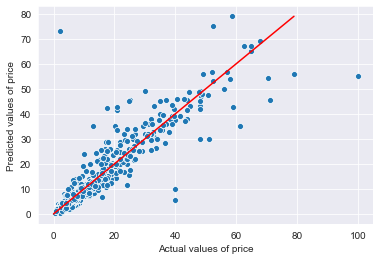

In [87]:
sns.scatterplot(x=y_test,y=preddec)
x=range(0,80)
y=range(0,80)
plt.plot(x,y,color='red')
plt.xlabel("Actual values of price")
plt.ylabel("Predicted values of price")

## Multiple Regression

In [89]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(x_train,y_train)   
predlin=reg.predict(x_test)
reg_ols=sm.OLS(endog=y_train,exog=x_train).fit()



- Finding the root mean squared error

In [90]:
mse=metrics.mean_squared_error(y_test,predlin)
rmse=math.sqrt(mse)
print('RMSE is:',rmse)

RMSE is: 5.750583776651055


- Graph between actual and predicted values:

Text(0, 0.5, 'Predicted values of price')

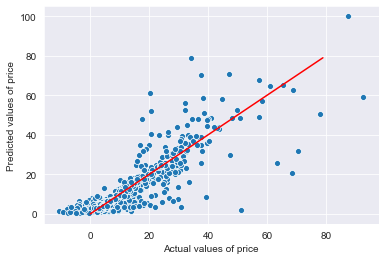

In [91]:
sns.scatterplot(predlin,y_test)
x=range(0,80)
y=range(0,80)
plt.plot(x,y,color='red')
plt.xlabel("Actual values of price")
plt.ylabel("Predicted values of price")

###  SELECTING THE BEST MODEL

- From all the above models, we can see that the Root mean squared error is minimum for LightGBM Regression.
- So, we will predict on the Test Data by using LightGBM Regressor.

## MAKING PREDICTIONS ON THE UNKNOWN(TEST) DATA

In [96]:
Predicted_price=lgbm.predict(test_tr)# Using LGBM Regressor, making predictions on the Unknown(Test) data.

In [97]:
Predicted_price=pd.DataFrame(Predicted_price,columns=['Predicted Price(in Lakhs)'])# Storing the predicted values in series

In [100]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    # Showing the predicted price

SyntaxError: unexpected EOF while parsing (<ipython-input-100-64121dbd1605>, line 2)

### Saving the predicted price in excelsheet

In [101]:
from pandas import ExcelWriter
with ExcelWriter('Predicted Prices on Unknown(Test) data.xlsx')as writer:# The file saved has name 'Predicted Prices on Unknown(Test) Data'
    Predicted_price.to_excel(writer)# Saving file in excelsheet
writer.save()

## CONCLUSIONS:

- We took into consideration 5 models namely,
- KNN
- Random Forest 
- LightGBM
- Decision Tree
- Multiple Regression
 We inferred from the above five models that, LightGBM has given us the least RMSE value.So we used this model for the prediction of dataset.
 
 We learnt many things through the discussions that we've made in successfully completing the project.
 
 This is a joint effort by our beloved teammates.
